<h1>Einlesen der drei Dateien covid19, einwohner und flaeche.</h1>

covid19: Enthält die Meldedaten über Covid19.

einwohner: Enthält die Einwohnerzahlen pro Kreis (Deutschland).

fläche: Enthält die Fläche (in Quadratkilometer) eines jeden Kreises (Deutschland).

In [39]:
import pandas as pd
covid19 = pd.read_csv("RKI_COVID19.csv")
einwohner = pd.read_csv("Einwohner.csv", delimiter=';')
flaeche = pd.read_csv("Flaeche.csv", delimiter=';')
covid19.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,10110919,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"03.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,10110920,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"03.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,10110921,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"03.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,10110922,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"03.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,10110923,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"03.06.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [40]:
einwohner.head()

,Stichtag,ID,Kreise,männlich,weiblich,Einwohner
0,31.12.2018,1001,"Flensburg, kreisfreie Stadt",44599,44905,89504
1,31.12.2018,1002,"Kiel, kreisfreie Stadt",120566,126982,247548
2,31.12.2018,1003,"Lübeck, kreisfreie Stadt",104371,112827,217198
3,31.12.2018,1004,"Neumünster, kreisfreie Stadt",39241,40246,79487
4,31.12.2018,1051,"Dithmarschen, Landkreis",65720,67490,133210


In [41]:
flaeche.head()

,ID,Kreise,Flaeche
0,1001,"Flensburg, kreisfreie Stadt",56.74
1,1002,"Kiel, kreisfreie Stadt",118.65
2,1003,"Lübeck, kreisfreie Stadt",214.21
3,1004,"Neumünster, kreisfreie Stadt",71.63
4,1051,"Dithmarschen, Landkreis",1428.14


<h1> Gruppieren des Covid19 Datensatzes nach Landkreis, um den Merge vorzunehmen. </h1>

Wir summieren, um AnzahlFall, AnzahlTodesfall, usw... als Summe für jeden Kreis zu berechnen. Durch diesen Schritt wird beispielsweise auch FID addiert, was in dem Kontext keinen Sinn macht. Das stört uns nicht, da wir diese Spalte nicht benötigen.

In [42]:
covid_gb_landkreis = covid19.groupby(["IdLandkreis", "Landkreis", "Bundesland"]).sum()

In [43]:
covid_gb_landkreis

,,,FID,IdBundesland,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn
IdLandkreis,Landkreis,Bundesland,,,,,,,,,
1001,SK Flensburg,Schleswig-Holstein,414548499,41,42,3,0,-342,-90,31,34
1002,SK Kiel,Schleswig-Holstein,2669328156,264,279,9,0,-2295,-89,269,221
1003,SK Lübeck,Schleswig-Holstein,1577363034,156,169,1,2,-1395,-17,167,138
1004,SK Neumünster,Schleswig-Holstein,758356275,75,79,2,0,-657,-27,76,65
1051,LK Dithmarschen,Schleswig-Holstein,566243020,56,59,3,0,-477,-27,56,51
...,...,...,...,...,...,...,...,...,...,...,...
16073,LK Saalfeld-Rudolstadt,Thüringen,697412998,1088,71,0,0,-612,-36,66,55
16074,LK Saale-Holzland-Kreis,Thüringen,646136757,1008,71,3,0,-540,-63,64,37
16075,LK Saale-Orla-Kreis,Thüringen,1394848436,2176,148,12,1,-1134,-153,131,116


<h1> Merge des Covid19 Datansatzes mit dem Einwohner Datensatz und anschließend mit dem Flächen Datensatz.</h1>

Wir müssen beachten, dass die Spalten in den drei Datensätzen nicht einheitlich "ID" heißen und somit in left und right Join unterscheiden.
Außerdem werden doppelte Spalten, die durch den Merge entstanden sind, entfernt. Wir erhalten unser gemergtes Dataframe, das wir für die weiteren Analysen verwenden.

In [44]:
# Merge
dataframe = pd.merge(covid_gb_landkreis, einwohner, left_on="IdLandkreis", right_on="ID")
dataframe = pd.merge(dataframe, flaeche, on="ID")

# Entferne doppelte Spalten
dataframe["Kreise"] = dataframe["Kreise_x"]
del dataframe["Kreise_x"]
del dataframe["Kreise_y"]
dataframe

,FID,IdBundesland,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Stichtag,ID,männlich,weiblich,Einwohner,Flaeche,Kreise
0,414548499,41,42,3,0,-342,-90,31,34,31.12.2018,1001,44599,44905,89504,56.74,"Flensburg, kreisfreie Stadt"
1,2669328156,264,279,9,0,-2295,-89,269,221,31.12.2018,1002,120566,126982,247548,118.65,"Kiel, kreisfreie Stadt"
2,1577363034,156,169,1,2,-1395,-17,167,138,31.12.2018,1003,104371,112827,217198,214.21,"Lübeck, kreisfreie Stadt"
3,758356275,75,79,2,0,-657,-27,76,65,31.12.2018,1004,39241,40246,79487,71.63,"Neumünster, kreisfreie Stadt"
4,566243020,56,59,3,0,-477,-27,56,51,31.12.2018,1051,65720,67490,133210,1428.14,"Dithmarschen, Landkreis"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,697412998,1088,71,0,0,-612,-36,66,55,31.12.2018,16073,52388,53968,106356,1036.03,"Saalfeld-Rudolstadt, Landkreis"
396,646136757,1008,71,3,0,-540,-63,64,37,31.12.2018,16074,41360,41691,83051,815.24,Saale-Holzland-Kreis
397,1394848436,2176,148,12,1,-1134,-153,131,116,31.12.2018,16075,40119,40749,80868,1151.30,Saale-Orla-Kreis
398,5753945307,8976,625,45,0,-4653,-768,535,490,31.12.2018,16076,48326,49833,98159,845.98,"Greiz, Landkreis"


<H1> Korrelationsmatrix </H1>

Wir berechnen eine Korrelationsmatrix mit den Werten, die wir direkt aus unserem Dataframe ziehen können.

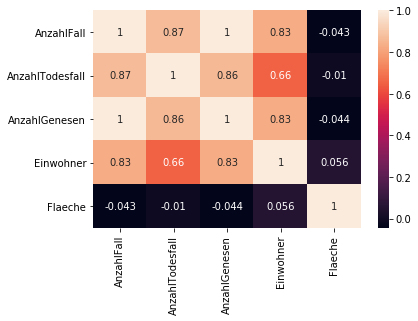

                 AnzahlFall  AnzahlTodesfall  AnzahlGenesen  Einwohner  \
AnzahlFall         1.000000         0.872361       0.998905   0.832192   
AnzahlTodesfall    0.872361         1.000000       0.863546   0.655130   
AnzahlGenesen      0.998905         0.863546       1.000000   0.829913   
Einwohner          0.832192         0.655130       0.829913   1.000000   
Flaeche           -0.042517        -0.010131      -0.043949   0.055683   

                  Flaeche  
AnzahlFall      -0.042517  
AnzahlTodesfall -0.010131  
AnzahlGenesen   -0.043949  
Einwohner        0.055683  
Flaeche          1.000000  


In [45]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = dataframe[["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen", "Einwohner", "Flaeche"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
print (corrMatrix)

Um weitere Informationen zu gewinnen, berechnen wir folgende Kennzahlen und fügen diese als neue Spalten in unser Dataframe ein:
- Einwohner pro Quadratkilometer
- Todesfälle pro 100 Fälle
- Todefälle pro 100 Einwohner


In [46]:
dataframe['Einwohner pro qkm'] = dataframe['Einwohner'] / dataframe['Flaeche']
dataframe['Todesfaelle pro 100 Faelle'] = dataframe['AnzahlTodesfall'] / (dataframe['AnzahlFall']/100)
dataframe['Todesfaelle pro 100 Einwohner'] = dataframe['AnzahlTodesfall'] / (dataframe['Einwohner']/100)

In [47]:
dataframe[["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen", "Einwohner", "Flaeche", "Einwohner pro qkm", 'Todesfaelle pro 100 Faelle', 'Todesfaelle pro 100 Einwohner']]

,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Einwohner,Flaeche,Einwohner pro qkm,Todesfaelle pro 100 Faelle,Todesfaelle pro 100 Einwohner
0,42,3,31,89504,56.74,1577.440959,7.142857,0.003352
1,279,9,269,247548,118.65,2086.371681,3.225806,0.003636
2,169,1,167,217198,214.21,1013.948929,0.591716,0.000460
3,79,2,76,79487,71.63,1109.688678,2.531646,0.002516
4,59,3,56,133210,1428.14,93.275169,5.084746,0.002252
...,...,...,...,...,...,...,...,...
395,71,0,66,106356,1036.03,102.657259,0.000000,0.000000
396,71,3,64,83051,815.24,101.873068,4.225352,0.003612
397,148,12,131,80868,1151.30,70.240598,8.108108,0.014839
398,625,45,535,98159,845.98,116.029930,7.200000,0.045844


Wir berechnen die Korrelationsmatrix erneut mit den drei zusätzlichen Spalten.

Es zeigt sich eine hohe Korrelation zwischen AnzahlFall, AnzahlTodesfall und AnzahlGenesener, aber auch zu Einwohner (und zu Einwohner pro qkm). Hingegen gibt es zwischen AnzahlFall und Faeche eine sehr geringe negative bis keine Korrelation.

Wir beschließen, ein Clustering Verfahren anzuwenden, um AnzahlFall und Einwohner genauer zu untersuchen.

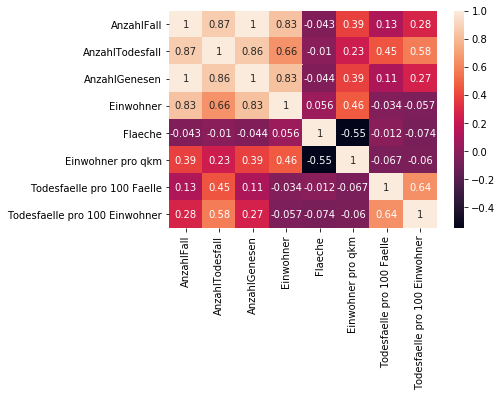

                               AnzahlFall  AnzahlTodesfall  AnzahlGenesen  \
AnzahlFall                       1.000000         0.872361       0.998905   
AnzahlTodesfall                  0.872361         1.000000       0.863546   
AnzahlGenesen                    0.998905         0.863546       1.000000   
Einwohner                        0.832192         0.655130       0.829913   
Flaeche                         -0.042517        -0.010131      -0.043949   
Einwohner pro qkm                0.389100         0.232624       0.388005   
Todesfaelle pro 100 Faelle       0.126328         0.447582       0.112263   
Todesfaelle pro 100 Einwohner    0.278380         0.578455       0.267186   

                               Einwohner   Flaeche  Einwohner pro qkm  \
AnzahlFall                      0.832192 -0.042517           0.389100   
AnzahlTodesfall                 0.655130 -0.010131           0.232624   
AnzahlGenesen                   0.829913 -0.043949           0.388005   
Einwohner     

In [48]:
corrMatrix = dataframe[["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen", "Einwohner", "Flaeche", "Einwohner pro qkm", 'Todesfaelle pro 100 Faelle', 'Todesfaelle pro 100 Einwohner']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
print (corrMatrix)

<H1>Clustering</H1>

Der KMeans Algorithmus wird verwendet, um ein Clustering mit AnzahlFall und Einwohner durchzuführen.

[[3.04189441e+02 1.39656714e+05]
 [8.23391892e+02 3.89850676e+05]
 [4.14775000e+03 1.38899375e+06]]


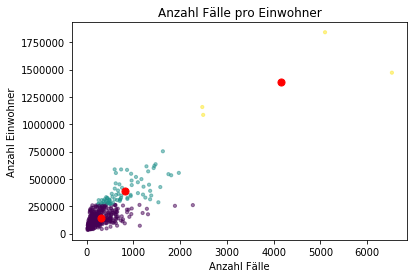

In [49]:
from sklearn.cluster import KMeans

df = pd.DataFrame(dataframe,columns=['AnzahlFall','Einwohner']) # ein neues Dataframe erzeugen, dass nur aus den beiden relevanten Spalten besteht
  
kmeans = KMeans(n_clusters=3).fit(df) # wir möchten n_clusters = 3 Cluster bilden
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['AnzahlFall'], df['Einwohner'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("Anzahl Fälle pro Einwohner")
plt.xlabel("Anzahl Fälle")
plt.ylabel("Anzahl Einwohner")

plt.show()

In [50]:
dataframe.loc[dataframe['AnzahlFall'] > 4000] # welche Kreise sind die beiden Ausreißer oben rechts? -> Hamburg und München

,FID,IdBundesland,AnzahlFall,AnzahlTodesfall,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Stichtag,ID,männlich,weiblich,Einwohner,Flaeche,Kreise,Einwohner pro qkm,Todesfaelle pro 100 Faelle,Todesfaelle pro 100 Einwohner
15,27533183793,5444,5098,253,0,-22689,-2382,4770,2120,31.12.2018,2000,902048,939131,1841179,755.09,"Hamburg, kreisfreie Stadt",2438.357017,4.962730,0.013741
223,34197672164,30168,6528,196,64,-28517,-3321,6028,2618,31.12.2018,9162,717308,754200,1471508,310.71,"München, kreisfreie Stadt",4735.953140,3.002451,0.013320


Wir probieren auch andere Spalten aus (z.B. AnzahlTodesfall) und eine andere Anzahl an Clustern. 
Wir sehen keine klar voneinander separierten Cluster, weshalb wir uns dazu entschließen weitere Analysen durchzuführen. 
Mithilfe von Regressionsalogrithmen möchten wir den zeitlichen Verlauf der Infektionszahlen (AnzahlFall) untersuchen. Also statt AnzahlFall und Einwohner konzentrieren wir uns auf Zeit und AnzahlFall.
Der zugehörige Code ist im Notebook "Regressionen.ipynb" zu finden.